In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('salary_prediction.csv')

In [5]:
df.head()

,CGPA,Projects,Skills,Salary
0,8.25,2.0,64.0,45500
1,7.97,1.0,71.0,62500
2,8.42,1.0,77.0,57000
3,7.86,3.0,80.0,69000
4,7.78,2.0,63.0,46500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CGPA      97 non-null     float64
 1   Projects  97 non-null     float64
 2   Skills    97 non-null     float64
 3   Salary    97 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 3.2 KB


In [11]:
df.shape

(97, 4)

In [90]:
#preprocessing of data: converting Skills from float datatype to int datatype
df['Skills']=df['Skills'].astype(int)

In [17]:
df['Skills'].head()

0    64
1    71
2    77
3    80
4    63
Name: Skills, dtype: int32

In [21]:
#EDA
import matplotlib.pyplot as plt

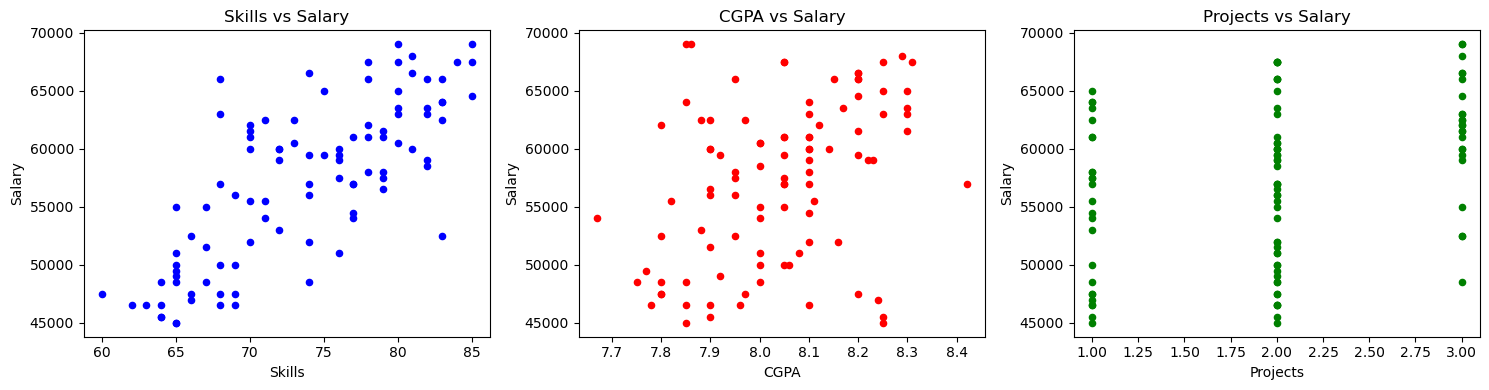

In [74]:
fig,ax=plt.subplots(1,3,figsize=(15,4))
ax[0].scatter(df['Skills'],df['Salary'],s=20,color='blue')
ax[0].set_xlabel('Skills')
ax[0].set_ylabel('Salary')
ax[0].set_title('Skills vs Salary')
ax[1].scatter(df['CGPA'],df['Salary'],s=20,color='red')
ax[1].set_xlabel('CGPA')
ax[1].set_ylabel('Salary')
ax[1].set_title('CGPA vs Salary')
ax[2].scatter(df['Projects'],df['Salary'],s=20,color='green')
ax[2].set_xlabel('Projects')
ax[2].set_ylabel('Salary')
ax[2].set_title('Projects vs Salary')
plt.tight_layout()

In [76]:
#from EDA we analysed our data and now we can safely say that using linear regression for this model will be more appropriate

In [80]:
#now we extract input and output columns
X=df.iloc[:,0:3]
Y=df.iloc[:,-1]

In [84]:
X.head()

,CGPA,Projects,Skills
0,8.25,2.0,64
1,7.97,1.0,71
2,8.42,1.0,77
3,7.86,3.0,80
4,7.78,2.0,63


In [86]:
Y.head()

0    45500
1    62500
2    57000
3    69000
4    46500
Name: Salary, dtype: int64

In [88]:
# now we divide the dataset into two parts: one for training and one for testing.
from sklearn.model_selection import train_test_split

In [92]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [94]:
X_train

,CGPA,Projects,Skills
61,7.85,1.0,83
45,7.80,1.0,68
84,8.05,2.0,84
32,7.90,2.0,79
55,7.80,3.0,78
...,...,...,...
90,8.05,2.0,68
30,8.16,2.0,70
47,8.15,2.0,83
53,7.90,2.0,74


In [96]:
Y_test

18    48500
67    55000
65    50000
6     63500
88    48500
33    66000
50    45000
34    51000
59    63000
41    46500
Name: Salary, dtype: int64

In [98]:
# now we can scale the values
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

In [102]:
X_train=scaler.fit_transform(X_train)

In [110]:
X_test=scaler.transform(X_test)

In [114]:
# after scaling, our dataset is ready to undergo training 
from sklearn.linear_model import LinearRegression

In [116]:
lrmodel=LinearRegression()

In [118]:
lrmodel.fit(X_train,Y_train)

LinearRegression()

In [122]:
# now that out model is ready, we evaluate out model
y_pred=lrmodel.predict(X_test)
results=pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
print(results)

    Actual     Predicted
18   48500  52814.396041
67   55000  52573.280500
65   50000  50735.571428
6    63500  60915.568551
88   48500  50024.229569
33   66000  54355.788610
50   45000  49490.495361
34   51000  50735.571428
59   63000  66804.726762
41   46500  50434.645832


In [130]:
from sklearn.metrics import r2_score

In [132]:
r2=r2_score(Y_test,y_pred)
print('Accuracy score:',r2)

Accuracy score: 0.5914771952129024


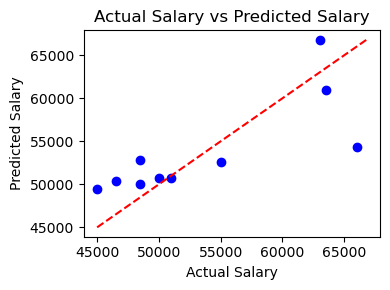

In [140]:
# now we plot the testing values and the predicted values
plt.figure(figsize=(4,3),dpi=100)
plt.scatter(Y_test,y_pred,color='blue')
min_val = min(min(Y_test), min(y_pred))
max_val = max(max(Y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual Salary vs Predicted Salary')
plt.tight_layout()

In [142]:
# the red line represents all the perfect values that the model should have predicted.
